## Read Dataset

In [1]:
import swifteda as sa
# URL do dataset Titanic
DATASET_TITANIC = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data_titanic = sa.load_dataset(DATASET_TITANIC)
data_titanic.show_summary();

✅ Dataset 'titanic.csv' loaded successfully. It has 891 rows and 12 columns (variables).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,null_count
Age,177
Cabin,687
Embarked,2


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Treatment of Duplicate and Null Data

In [2]:
data_titanic = data_titanic.find_duplicates().drop_duplicates() \
                           .fill_na(strategy='median', subset=['Age']) \
                           .fill_na(strategy='mode', subset=['Embarked']) \
                           .drop_columns(['Cabin']) \
                           .show_summary();

✅ No duplicate rows found in the dataset.

ℹ️ No action needed, no duplicate rows to remove.

✏️  Null values in column 'Age' filled with median (28.00).

✏️  Null values in column 'Embarked' filled with mode ('S').

🗑️ Column(s) ['Cabin'] removed.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


,null_count


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Create Categorical Features with Numeric Features

In [4]:
data_titanic.bin_numeric_column(
    column='Age',
    new_column_name='AgeGroup',
    bins=[0, 13, 20, 40, 65, 120],  # Bins: 0-12, 13-19, 20-39, 40-64, 65+
    labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
);

print("\n--- Checking the new column 'AgeGroup' ---")
display(data_titanic._df[['Age', 'AgeGroup']].head(10))

🛠️  Feature 'AgeGroup' created from column 'Age'.

--- Checking the new column 'AgeGroup' ---


,Age,AgeGroup
0,22.0,Young Adult
1,38.0,Young Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
5,28.0,Young Adult
6,54.0,Adult
7,2.0,Child
8,27.0,Young Adult
9,14.0,Teenager


## Plot Data

   (Found 891 unique values)
   -> Too many unique values to display and plot. Skipping chart.


   (Found 2 unique values)


,count
Sex,
male,577
female,314


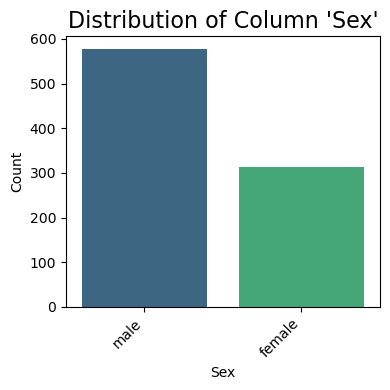

   (Found 681 unique values)
   -> Too many unique values to display and plot. Skipping chart.


   (Found 3 unique values)


,count
Embarked,
S,646
C,168
Q,77


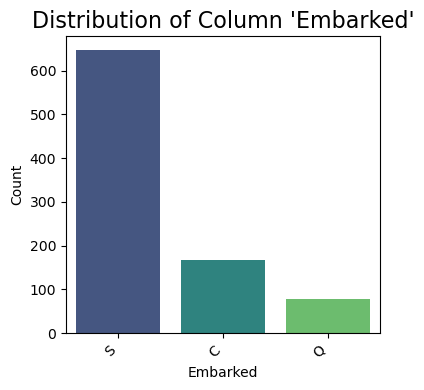

   (Found 5 unique values)


,count
AgeGroup,
Young Adult,564
Adult,152
Teenager,95
Child,69
Senior,11


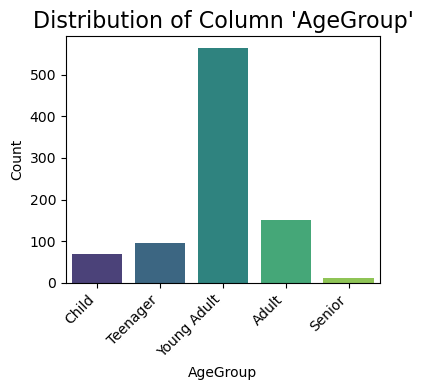

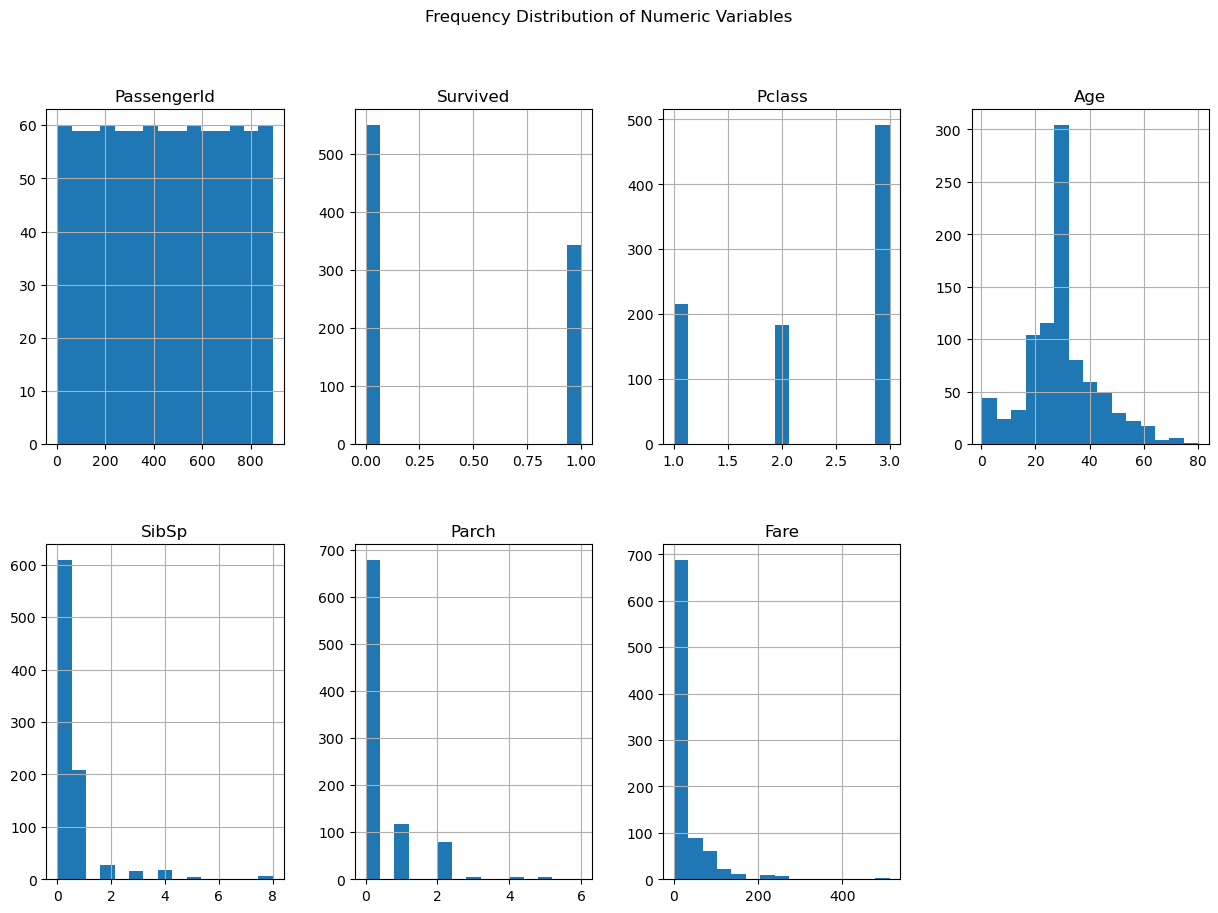


Generating correlation heatmap...


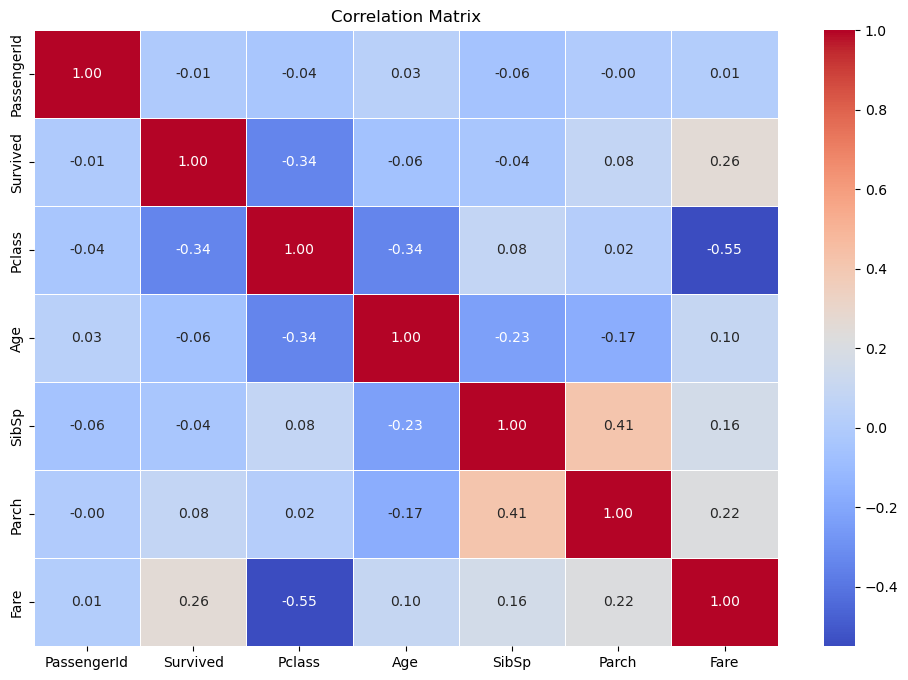

,Variable 1,Variable 2,Correlation
0,Fare,Pclass,-0.5495
1,Parch,SibSp,+0.4148
2,Age,Pclass,-0.3399
3,Survived,Pclass,-0.3385
4,Survived,Fare,+0.2573


In [5]:
data_titanic.analyze_categoricals().plot_distributions().plot_correlations();

## Machine Learning Modeling

In [6]:
ml_results = data_titanic.run_classification_benchmark(target='Survived')

📊 Data split: 80% for training, 20% for testing.
⚙️  Training the model...
✅ Model trained successfully.
🏁 Benchmark completed. Results returned.


## Generate Analysis Report

In [9]:
data_titanic.generate_report(
    output_path='Complete_Report_Titanic.pdf',
    ml_results=ml_results
);

📄 Generating PDF report at 'Complete_Report_Titanic.pdf'...
✅ Report successfully saved at 'Complete_Report_Titanic.pdf'!
